In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [25]:
# Remove Unnecessary Column
df = df.drop("Unnamed: 0", axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# EDA (Exploratory Data Analysis)

In [28]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [29]:
#Summary Statistics
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='newspaper', ylabel='sales'>

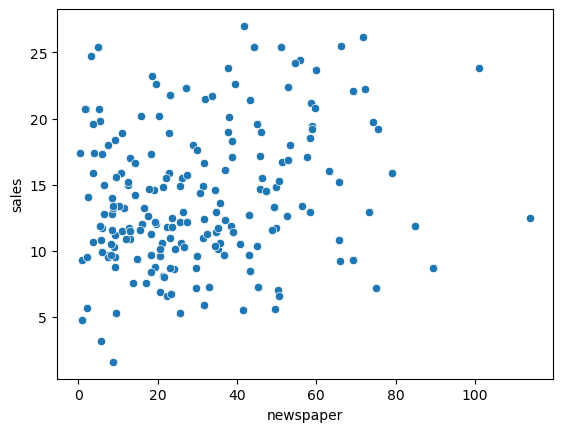

In [31]:
sns.scatterplot(data = df, x='newspaper', y = 'sales')

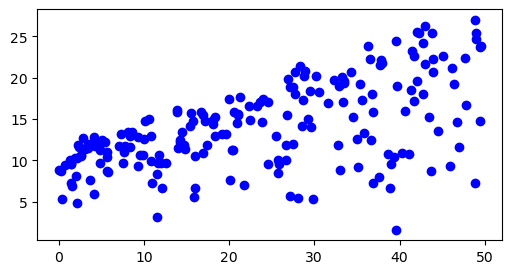

In [37]:
plt.figure(figsize=(6,3))
plt.scatter(df['radio'], df['sales'], c='b')
plt.show()

<Axes: xlabel='TV', ylabel='sales'>

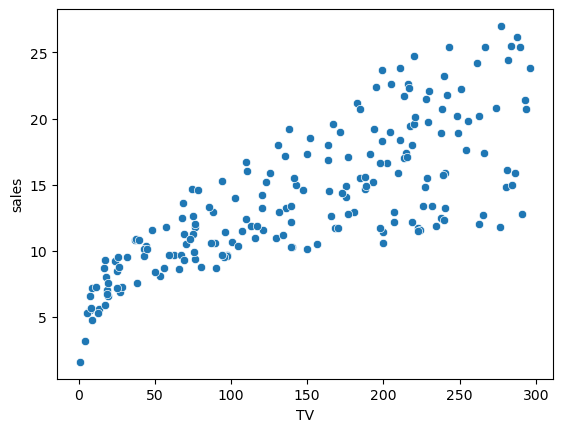

In [35]:
sns.scatterplot(data= df, x='TV', y = 'sales')

# Correlation Heatmap

In [39]:
data_correlation = df.corr()
data_correlation


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


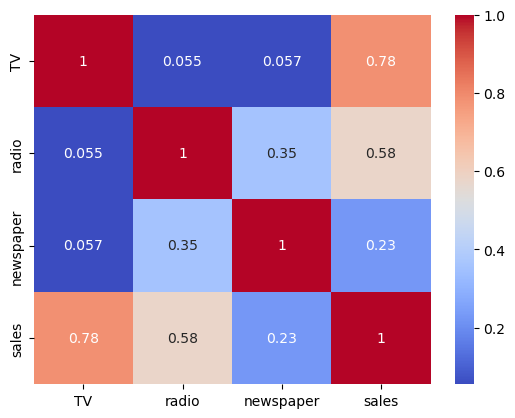

In [38]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Define Features (X) & Target (y)

In [41]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [44]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [45]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [43]:
#Train–Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(        TV  radio  newspaper
 79   116.0    7.7       23.1
 197  177.0    9.3        6.4
 38    43.1   26.7       35.1
 24    62.3   12.6       18.3
 122  224.0    2.4       15.6
 ..     ...    ...        ...
 106   25.0   11.0       29.7
 14   204.1   32.9       46.0
 92   217.7   33.5       59.0
 179  165.6   10.0       17.6
 102  280.2   10.1       21.4
 
 [160 rows x 3 columns],
         TV  radio  newspaper
 95   163.3   31.6       52.9
 15   195.4   47.7       52.9
 30   292.9   28.3       43.2
 158   11.7   36.9       45.2
 128  220.3   49.0        3.2
 115   75.1   35.0       52.7
 69   216.8   43.9       27.2
 170   50.0   11.6       18.4
 174  222.4    3.4       13.1
 45   175.1   22.5       31.5
 66    31.5   24.6        2.2
 182   56.2    5.7       29.7
 165  234.5    3.4       84.8
 78     5.4   29.9        9.4
 186  139.5    2.1       26.6
 177  170.2    7.8       35.2
 56     7.3   28.1       41.4
 152  197.6   23.3       14.2
 82    75.3   20.3       32.5
 68   237.4  

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regression Model

In [50]:
# Create model
model = RandomForestRegressor(n_estimators=200, random_state=42)

In [51]:
# Train model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [52]:
# Predictions
y_test_pred = model.predict(X_test)

In [53]:
# Evaluation
print("\nRandom Forest Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))


Random Forest Regression Results:
RMSE: 0.7572349907723515
MAE: 0.6287125000000021
R² Score: 0.9818333477552758


# Linear Regression Model

In [54]:
# Create model
model = LinearRegression()

In [55]:
# Train model
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predictions
y_test_pred = model.predict(X_test)

In [58]:
# Evaluation
print("\nLinear Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))



Linear Regression Results:
RMSE: 1.7815996615334502
MAE: 1.4607567168117606
R² Score: 0.899438024100912


# Gradient Boosting Regressor Model

In [59]:
# Create model
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [60]:
# Train model
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [61]:
# Predictions
y_test_pred = model.predict(X_test)

In [62]:
# Evaluation
print("\nGradient Boosting Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))


Gradient Boosting Regression Results:
RMSE: 0.72862479698769
MAE: 0.6160877394928734
R² Score: 0.9831801759016952


# XGBoost Regressor Model

In [63]:
# Create model
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [64]:
# Train model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [65]:
# Predictions
y_test_pred = model.predict(X_test)

In [67]:
# Evaluation
print("\nXGBoost Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))



XGBoost Regression Results:
RMSE: 0.9739022056065193
MAE: 0.7571460890769959
R² Score: 0.9699500154007259


# Support Vector Regressor (SVR) Model

In [68]:
# Create model
model = SVR(kernel='rbf', C=100, gamma='scale')

In [69]:
# Train model
model.fit(X_train_scaled, y_train)

SVR(C=100)

In [70]:
# Predictions
y_test_pred = model.predict(X_test_scaled)

In [71]:
# Evaluation
print("\nSVR Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))



SVR Regression Results:
RMSE: 0.9559380612988211
MAE: 0.6718660357921442
R² Score: 0.9710483671701753


# Lasso Regression

In [77]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [78]:
#prediction
y_pred = model.predict(X_test)

In [79]:
#Evaluation
print("\nLasso Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Lasso Regression Results:
RMSE: 1.7805959150767847
MAE: 1.4597951733194978
R² Score: 0.8995513046486308


In [80]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": SVR()
}

In [81]:
results = [] 

for name, model in models.items():
    if name == "SVR":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, rmse, mae, r2])  

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R² Score"])
print(results_df)

               Model      RMSE       MAE  R² Score
0  Linear Regression  1.781600  1.460757  0.899438
1              Lasso  1.773046  1.452202  0.900401
2      Random Forest  0.774764  0.631250  0.980983
3  Gradient Boosting  0.722219  0.616771  0.983475
4            XGBoost  0.932166  0.725829  0.972470
5                SVR  1.691777  1.162139  0.909322


In [82]:
#Best Model based on R² Score
best_model_row = results_df.loc[results_df['R² Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model_r2 = best_model_row['R² Score']

print(f"\n Best Model: {best_model_name} with R² Score = {best_model_r2:.4f}")


 Best Model: Gradient Boosting with R² Score = 0.9835
